In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_log_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.decomposition import PCA

In [2]:
df_trains=pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')

In [3]:
df_train=df_trains.copy()

In [4]:
df_train

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0            0    male   36   189.0    82.0      26.0       101.0       41.0   
1            1  female   64   163.0    60.0       8.0        85.0       39.7   
2            2  female   51   161.0    64.0       7.0        84.0       39.8   
3            3    male   20   192.0    90.0      25.0       105.0       40.7   
4            4  female   38   166.0    61.0      25.0       102.0       40.6   
...        ...     ...  ...     ...     ...       ...         ...        ...   
749995  749995    male   28   193.0    97.0      30.0       114.0       40.9   
749996  749996  female   64   165.0    63.0      18.0        92.0       40.5   
749997  749997    male   60   162.0    67.0      29.0       113.0       40.9   
749998  749998    male   45   182.0    91.0      17.0       102.0       40.3   
749999  749999  female   39   171.0    65.0      19.0        97.0       40.6   

        Calories  
0          150.0  
1           34.0  
2           29.0  
3          140.0  
4          146.0  
...          ...  
749995     230.0  
749996      96.0  
749997     221.0  
749998     109.0  
749999     103.0  

[750000 rows x 9 columns]

In [5]:
df_train.describe()

id            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      41.420404     174.697685      75.145668   
std    216506.495284      15.175049      12.824496      13.982704   
min         0.000000      20.000000     126.000000      36.000000   
25%    187499.750000      28.000000     164.000000      63.000000   
50%    374999.500000      40.000000     174.000000      74.000000   
75%    562499.250000      52.000000     185.000000      87.000000   
max    749999.000000      79.000000     222.000000     132.000000   

            Duration     Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  750000.000000  
mean       15.421015      95.483995      40.036253      88.282781  
std         8.354095       9.449845       0.779875      62.395349  
min         1.000000      67.000000      37.100000       1.000000  
25%         8.000000      88.000000      39.600000      34.000000  
50%        15.000000      95.000000      40.300000      77.000000  
75%        23.000000     103.000000      40.700000     136.000000  
max        30.000000     128.000000      41.500000     314.000000

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


* no null value

In [7]:
df_train=df_train.drop('id',axis=1)

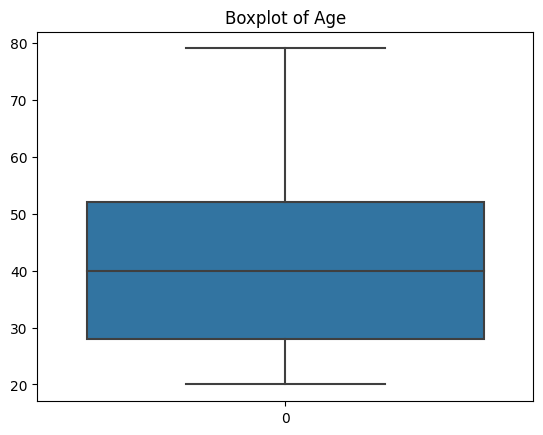

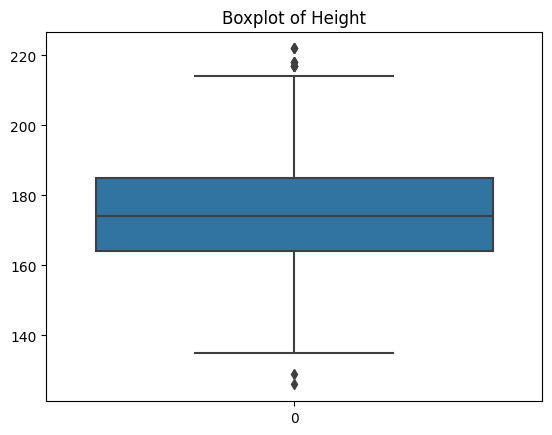

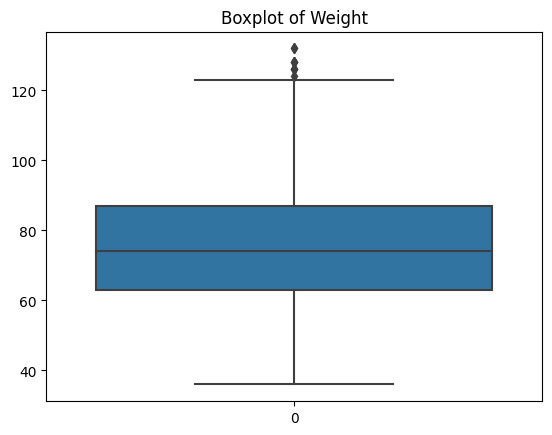

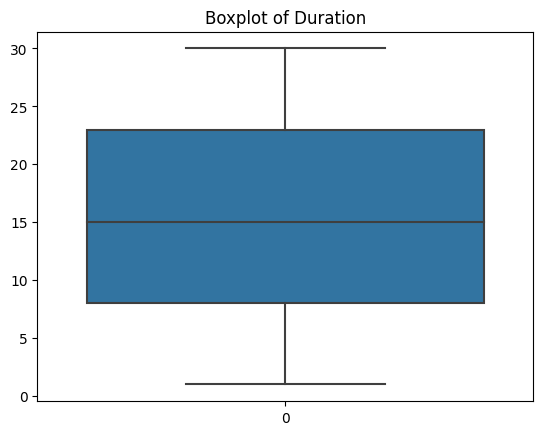

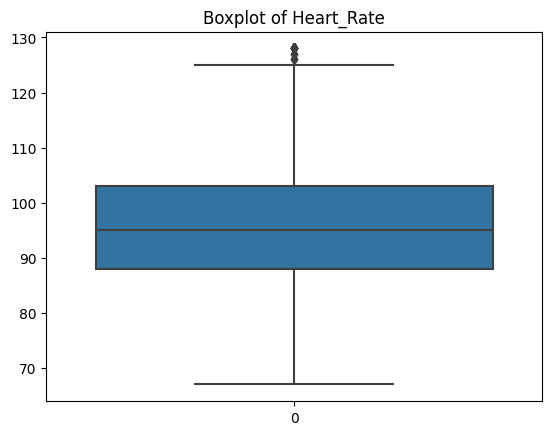

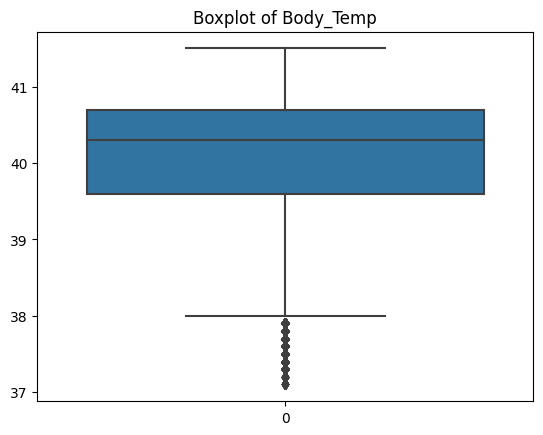

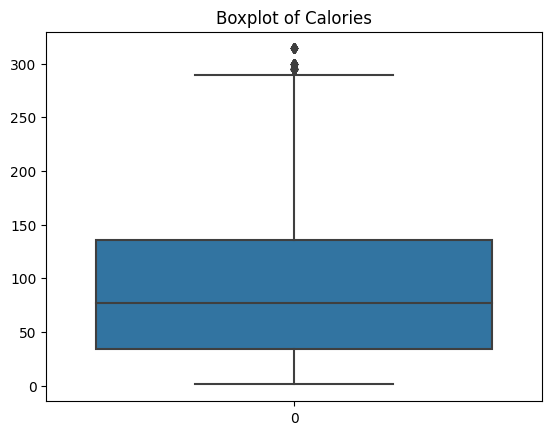

In [8]:
numerical_columns=df_train.select_dtypes(include=['int','float']).columns
for i in numerical_columns:

    sns.boxplot(df_train[i])
    plt.title(f'Boxplot of {i}')
    plt.show()
    

* there no notable outlier

In [9]:
correlation= df_train.select_dtypes(include=['int','float']).corr()
print(correlation)

                 Age    Height    Weight  Duration  Heart_Rate  Body_Temp  \
Age         1.000000  0.011975  0.073690  0.015656    0.017037   0.030275   
Height      0.011975  1.000000  0.957967 -0.029936   -0.013234  -0.034641   
Weight      0.073690  0.957967  1.000000 -0.020845   -0.002384  -0.023717   
Duration    0.015656 -0.029936 -0.020845  1.000000    0.875327   0.903066   
Heart_Rate  0.017037 -0.013234 -0.002384  0.875327    1.000000   0.795972   
Body_Temp   0.030275 -0.034641 -0.023717  0.903066    0.795972   1.000000   
Calories    0.145683 -0.004026  0.015863  0.959908    0.908748   0.828671   

            Calories  
Age         0.145683  
Height     -0.004026  
Weight      0.015863  
Duration    0.959908  
Heart_Rate  0.908748  
Body_Temp   0.828671  
Calories    1.000000  


<Axes: >

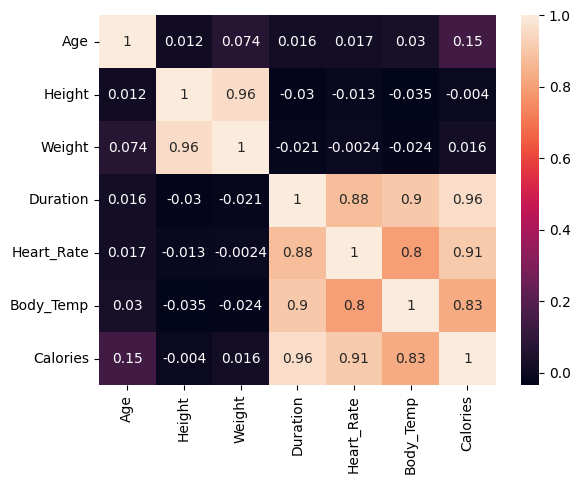

In [10]:
sns.heatmap(correlation,annot=True)

* Duration is highest correlation for Calories on 96
* also Heat_Rate and Body Temp is also have high correlation 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


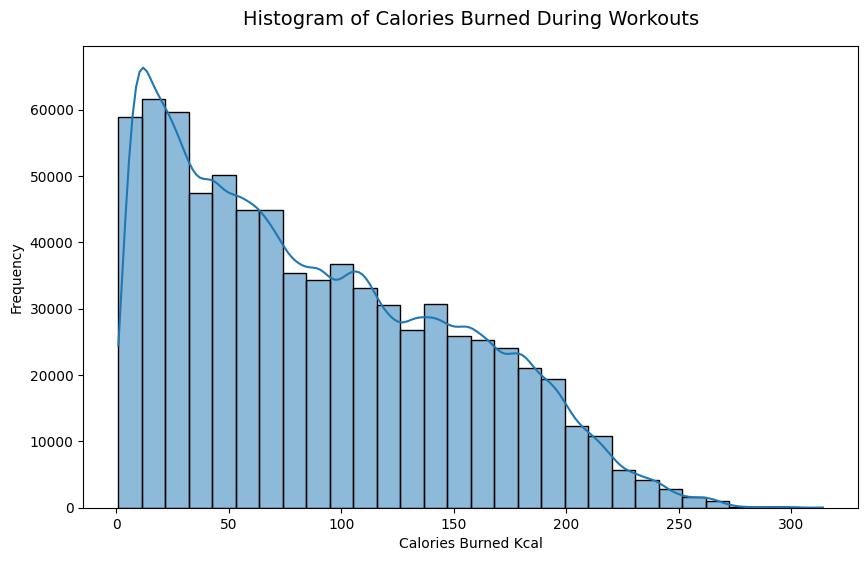

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_train['Calories'],bins=30,kde=True)
plt.title('Histogram of Calories Burned During Workouts',fontsize=14,pad=15)
plt.xlabel('Calories Burned Kcal')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


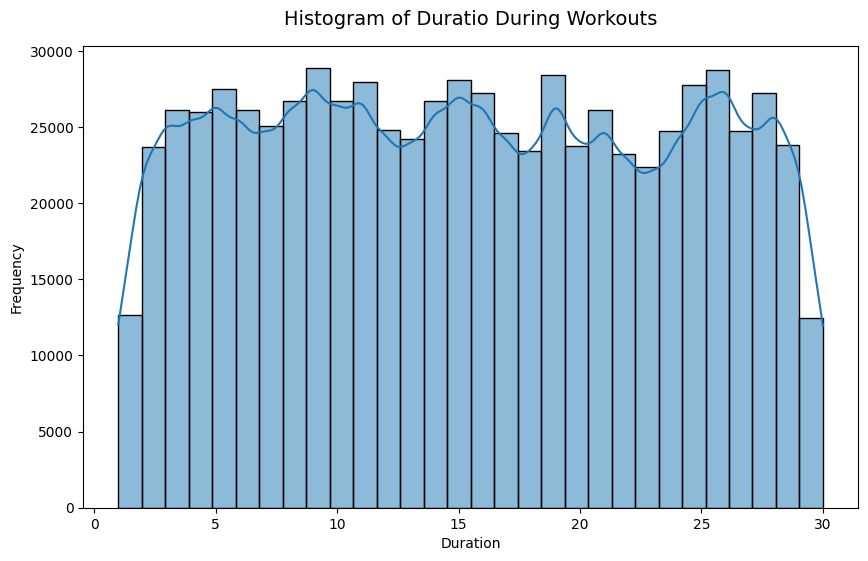

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_train['Duration'],bins=30,kde=True)
plt.title('Histogram of Duratio During Workouts',fontsize=14,pad=15)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


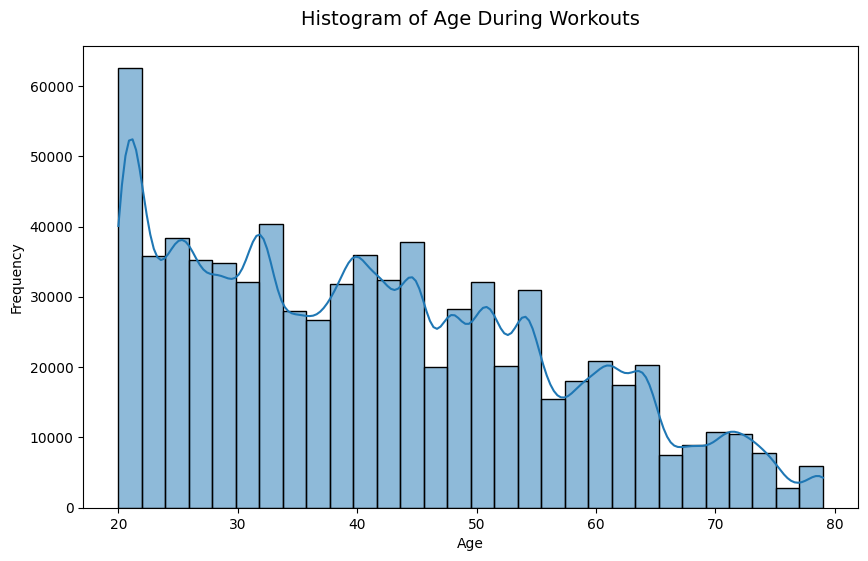

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_train['Age'],bins=30,kde=True)
plt.title('Histogram of Age During Workouts',fontsize=14,pad=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_35/1460918022.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


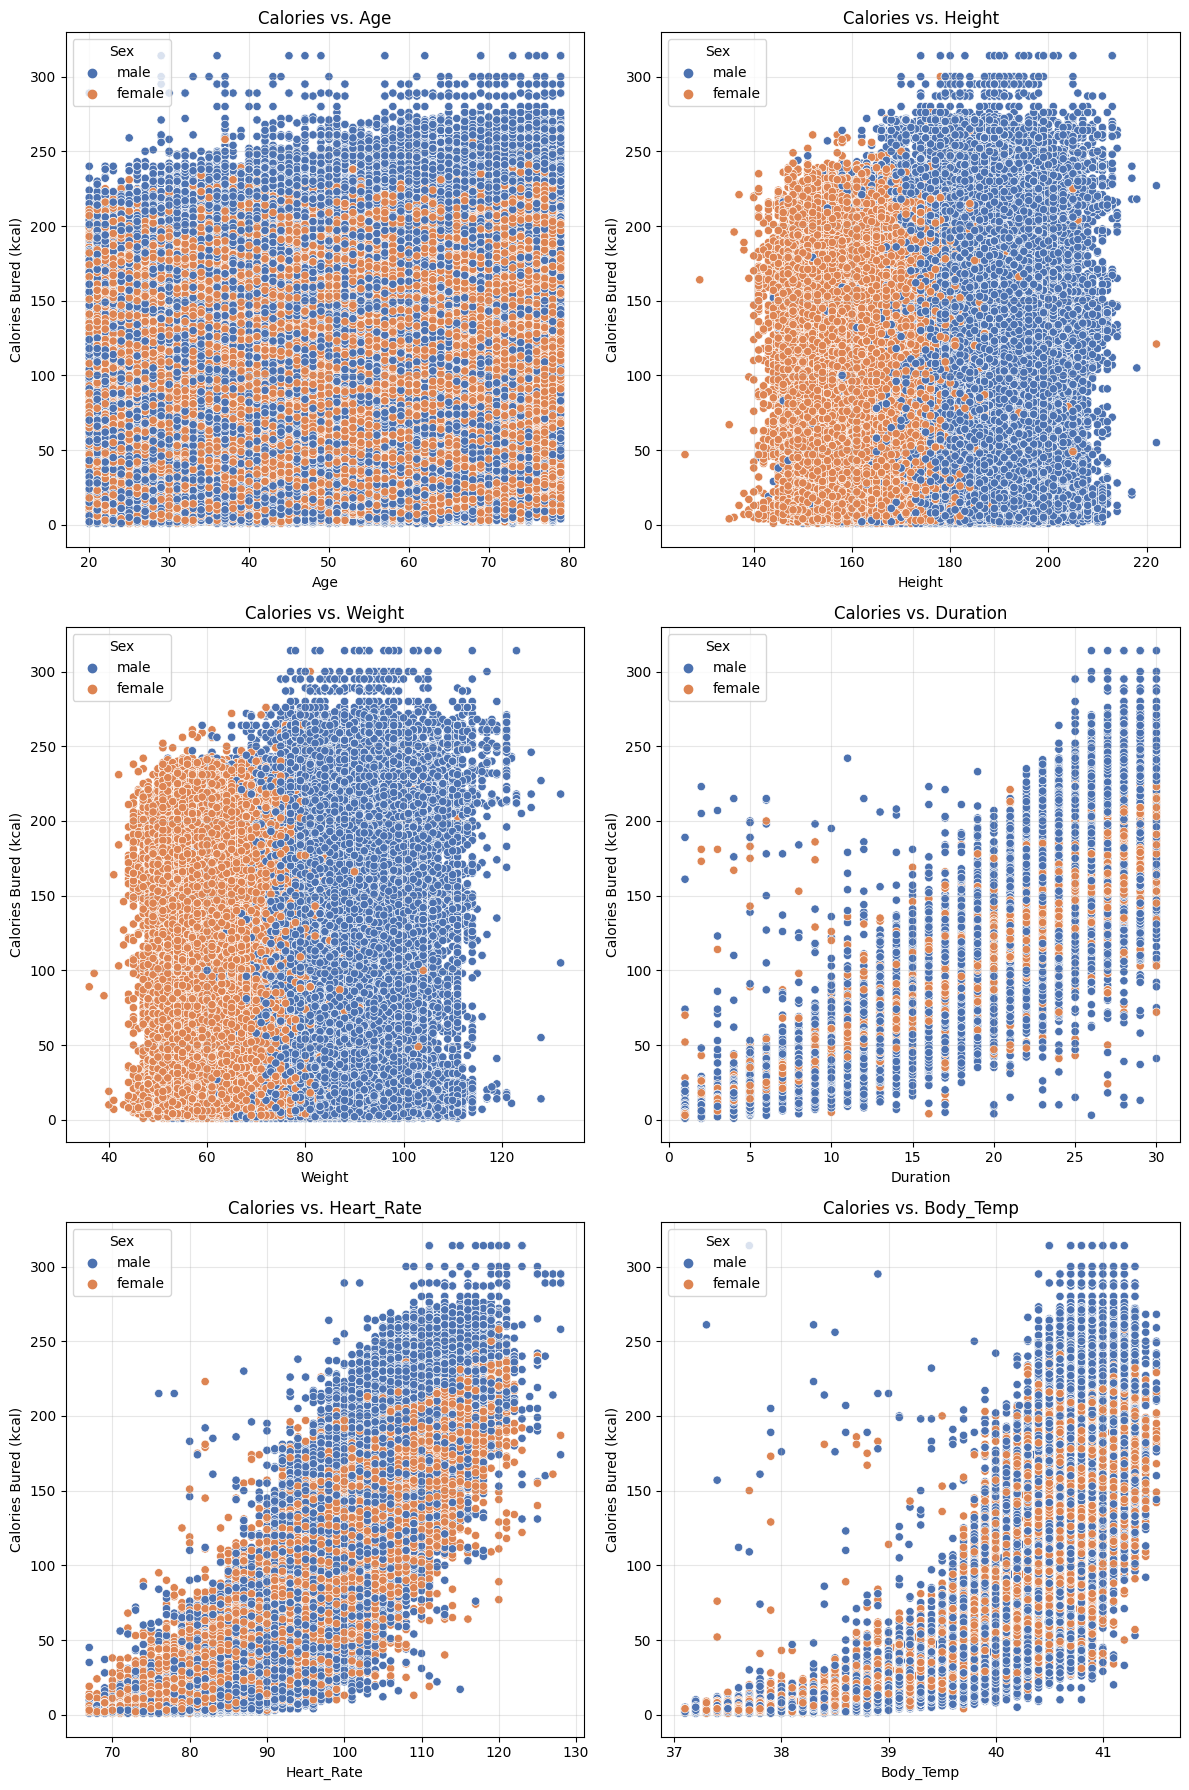

In [14]:
indipendi_column=['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',]
fig,axes=plt.subplots(3,2,figsize=(12,18))
axes=axes.flatten()
for i ,feature in enumerate(indipendi_column):
    sns.scatterplot(data=df_train,x=feature ,y='Calories',hue='Sex',palette='deep',ax=axes[i])
    axes[i].set_title(f'Calories vs. {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Calories Bured (kcal)')
    axes[i].grid(True,alpha=0.3)
    axes[i].legend(title='Sex')
plt.tight_layout()
plt.show()

In [15]:
df=df_train.copy()
# Convert Age to categorical (Young, Middle, Old)
bins = [0, 30, 50, float('inf')]  # Age ranges: <30, 30-50, >50
labels = ['Young', 'Middle', 'Old']
df['Age_Category'] = pd.cut(df_train['Age'], bins=bins, labels=labels, include_lowest=True).astype(str)

In [16]:
# Verify the new column
print("Age Category Distribution:")
print(df['Age_Category'].value_counts())

Age Category Distribution:
Age_Category
Middle    313201
Young     222089
Old       214710
Name: count, dtype: int64


/tmp/ipykernel_35/2338926145.py:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


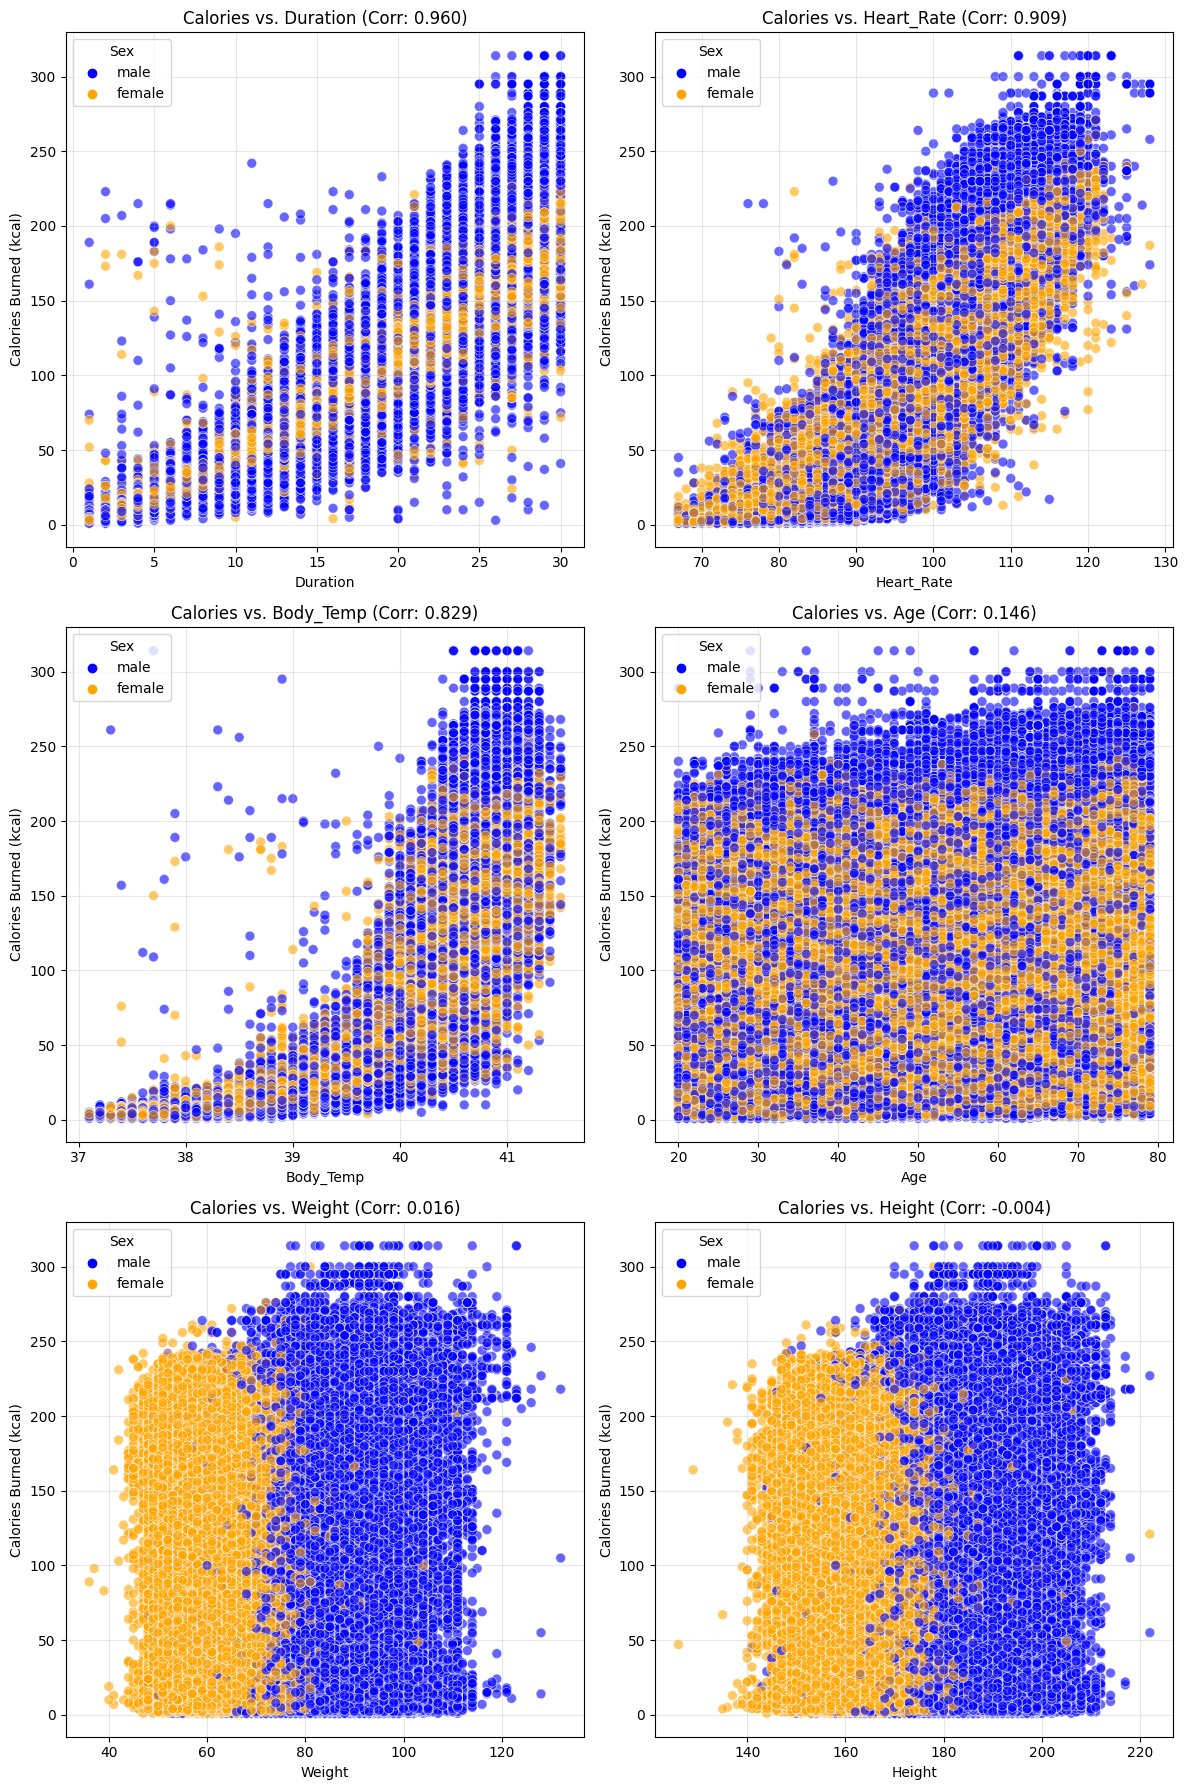

In [17]:
# Define numerical features to plot against Calories (including original Age)
numerical_features = ['Duration', 'Heart_Rate', 'Body_Temp', 'Age', 'Weight', 'Height']

# Set up the plot grid (3 rows, 2 columns for 6 features)
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.flatten()  # Flatten to iterate over axes

# Create scatter plots for each numerical feature vs. Calories, colored by Sex
for i, feature in enumerate(numerical_features):
    sns.scatterplot(data=df, x=feature, y='Calories', hue='Sex', palette={'male': 'blue', 'female': 'orange'}, 
                    ax=axes[i], alpha=0.6, s=50)
    axes[i].set_title(f'Calories vs. {feature} (Corr: {df[feature].corr(df["Calories"]):.3f})', fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Calories Burned (kcal)', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].legend(title='Sex')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

/tmp/ipykernel_35/1390473275.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


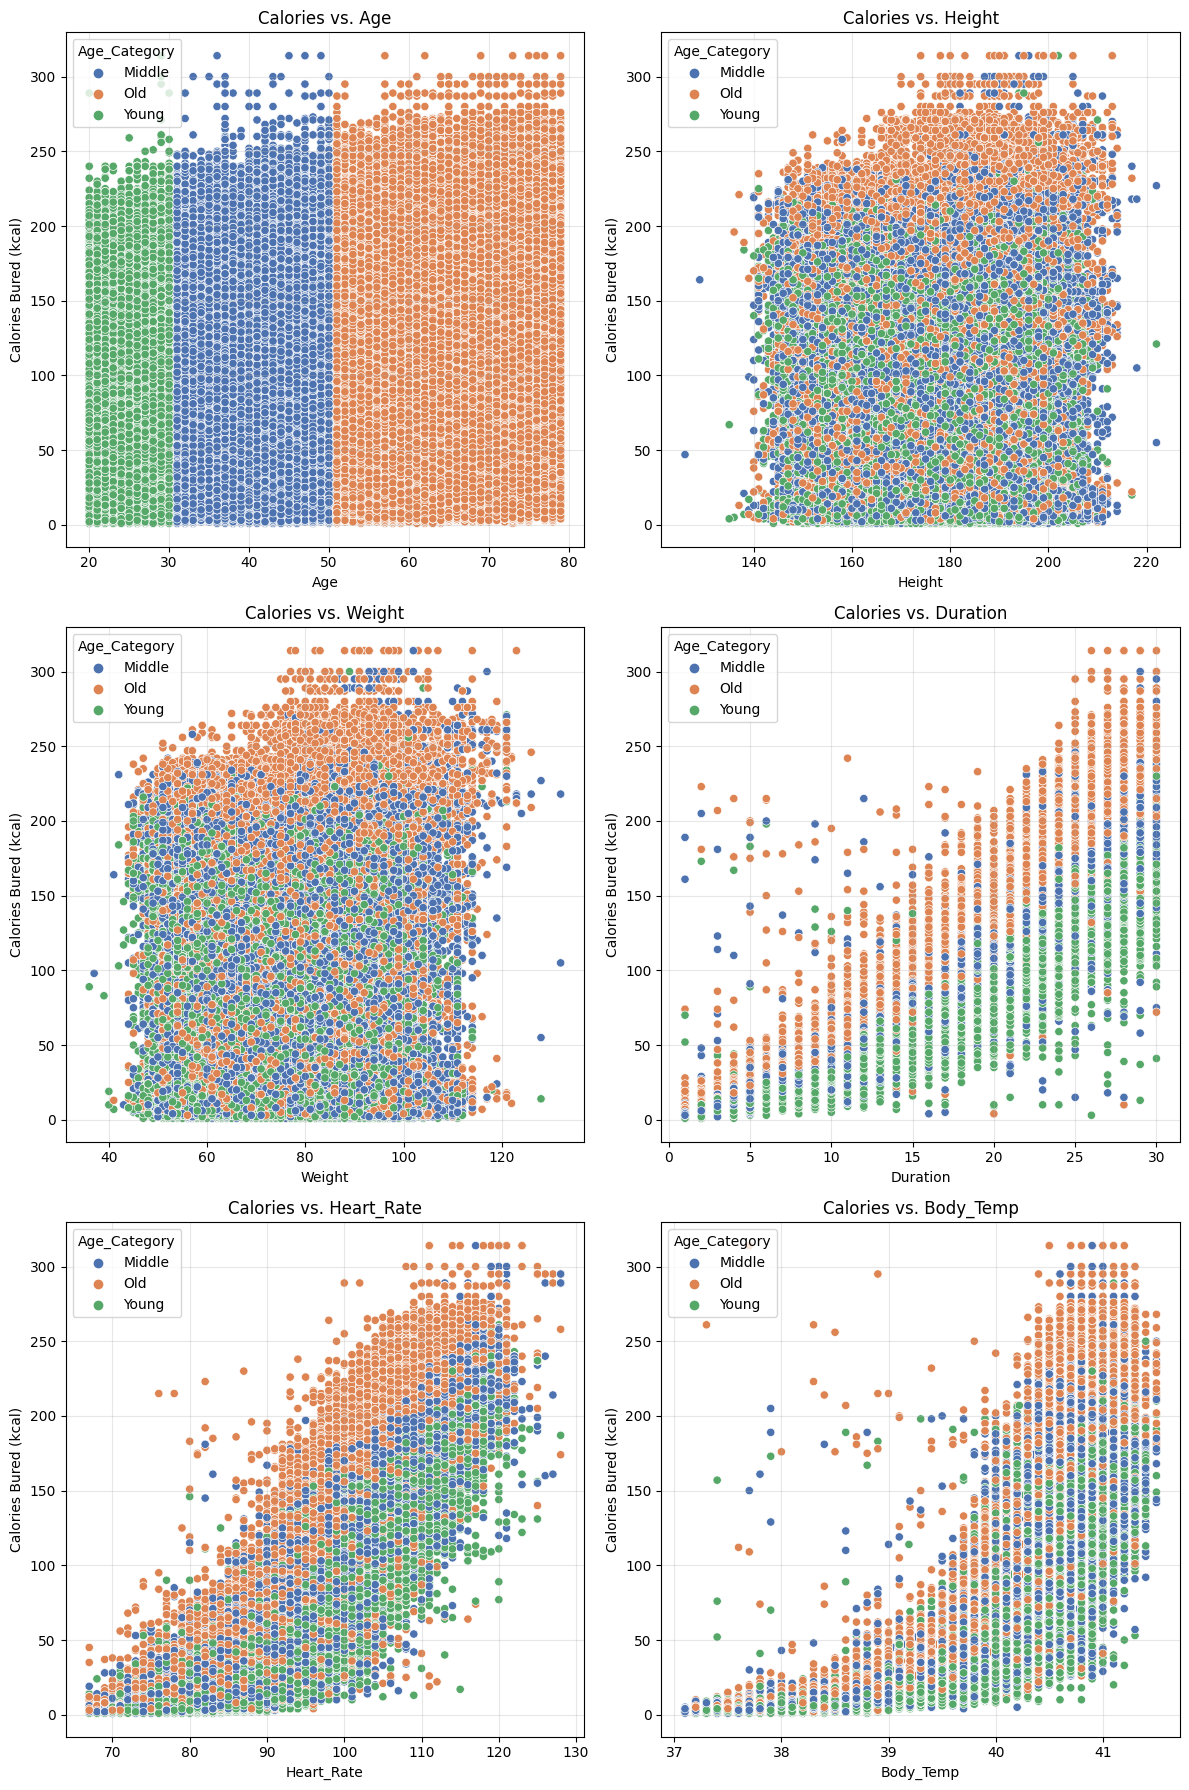

In [18]:
indipendi_column=['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',]
fig,axes=plt.subplots(3,2,figsize=(12,18))
axes=axes.flatten()
for i ,feature in enumerate(indipendi_column):
    sns.scatterplot(data=df,x=feature ,y='Calories',hue='Age_Category',palette='deep',ax=axes[i])
    axes[i].set_title(f'Calories vs. {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Calories Bured (kcal)')
    axes[i].grid(True,alpha=0.3)
    axes[i].legend(title='Age_Category')
plt.tight_layout()
plt.show()

* old pepole born more calories camper to Middile and then yang 
* old pepole fatses burning rate  calories campare to Middile and yang age
* and old pepole burn calories even lass Heart_rate

In [19]:
# Preprocessing
# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # 'M'/'F' to 0/1
#test_df['Sex'] = le.transform(test_df['Sex'])

# One-hot encode Age_Category
df = pd.get_dummies(df, columns=['Age_Category'], prefix='Age')
#test_df = pd.get_dummies(test_df, columns=['Age_Category'], prefix='Age')

In [20]:
# Define features and target
features = ['Sex',  'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 
            'Age_Young', 'Age_Middle', 'Age_Old']
X = df[features]
y = df['Calories']
#X_test = test_df[features]

In [21]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = [ 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
#X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

/tmp/ipykernel_35/2462269861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [22]:
# Split training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Custom RMSLE scorer
def rmsle_scorer(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, None)  # Clip predictions to avoid negative/zero values
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [24]:
import time
# Initialize models
# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'LightGBM': lgb.LGBMRegressor(
        objective='regression',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        device_type='cpu',  # Fallback to CPU
        random_state=42,
        n_jobs=-1
    )
}

# Ensemble: Voting Regressor
ensemble = VotingRegressor(
    estimators=[
        ('rf', models['Random Forest']),
        ('gb', models['Gradient Boosting']),
        ('lgb', models['LightGBM'])
    ]
)
models['Ensemble (RF+GB+LGBM)'] = ensemble

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model_start_time = time.time()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred = np.clip(y_pred, 0, None)
    
    rmsle = rmsle_scorer(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    results[name] = {'RMSLE': rmsle, 'R2': r2}
    print(f"{name} RMSLE: {rmsle:.4f}")
    print(f"{name} R²: {r2:.4f}")
    print(f"{name} Time: {time.time() - model_start_time:.2f} seconds")

# Print results
print("\nModel Comparison:")
print("Model\t\t\tRMSLE\t\tR²")
for name, metrics in results.items():
    print(f"{name:<20}\t{metrics['RMSLE']:.4f}\t\t{metrics['R2']:.4f}")

# Best model (based on RMSLE)
best_model = min(results, key=lambda x: results[x]['RMSLE'])
print(f"\nBest Model (by RMSLE): {best_model} (RMSLE: {results[best_model]['RMSLE']:.4f}, R²: {results[best_model]['R2']:.4f})")

# Feature importance for tree-based models
for name in ['Random Forest', 'Gradient Boosting', 'LightGBM']:
    if name in models:
        print(f"\nFeature Importance for {name}:")
        importance = pd.Series(models[name].feature_importances_, index=features).sort_values(ascending=False)
        print(importance)



Training Random Forest...
Random Forest RMSLE: 0.0862
Random Forest R²: 0.9917
Random Forest Time: 32.77 seconds

Training Linear Regression...
Linear Regression RMSLE: 0.5600
Linear Regression R²: 0.9683
Linear Regression Time: 0.36 seconds

Training Gradient Boosting...


KeyboardInterrupt: 

# **Techniques to Increase Accuracy**

In [25]:
train_df=df.copy()


In [26]:
# Check for negative values in Calories
if (train_df['Calories'] < 0).any():
    print("Warning: Negative values found in Calories. Clipping to 0.")
    train_df['Calories'] = train_df['Calories'].clip(lower=0)

In [27]:
# Outlier capping
train_df = train_df[train_df['Heart_Rate'].between(40, 200)]
train_df = train_df[train_df['Body_Temp'].between(36, 42)]
train_df = train_df[train_df['Calories'] < 1000]

In [28]:
# Feature engineering
train_df['BMI'] = train_df['Weight'] / (train_df['Height'] / 100) ** 2
train_df['Duration_Heart_Rate'] = train_df['Duration'] * train_df['Heart_Rate']
train_df['Weight_Duration'] = train_df['Weight'] * train_df['Duration']
train_df['Age_Duration'] = train_df['Age'] * train_df['Duration']
train_df['Age_Body_Temp'] = train_df['Age'] * train_df['Body_Temp']
train_df['Body_Temp_Duration'] = train_df['Body_Temp'] * train_df['Duration']
train_df['Body_Temp_Heart_Rate'] = train_df['Body_Temp'] * train_df['Heart_Rate']
train_df['Age_Heart_Rate'] = train_df['Age'] * train_df['Heart_Rate']
train_df['Body_Temp_Heart_Rate_Duration'] = train_df['Body_Temp'] * train_df['Heart_Rate'] * train_df['Duration']

In [29]:
# Create Age_Category
bins = [0, 30, 50, float('inf')]
labels = ['Young', 'Middle', 'Old']
train_df['Age_Category'] = pd.cut(train_df['Age'], bins=bins, labels=labels, include_lowest=True).astype(str)
train_df['Age_Old_Duration'] = train_df['Age_Category'].apply(lambda x: 1 if x == 'Old' else 0) * train_df['Duration']

In [30]:
# Preprocessing
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Age_Middle'] = le.fit_transform(train_df['Age_Middle'])
train_df[ 'Age_Old'] = le.fit_transform(train_df['Age_Old'])
train_df[ 'Age_Young'] = le.fit_transform(train_df[ 'Age_Young'])


In [ ]:
train_df.columns

In [31]:

# Define base features
base_features = ['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
                     'Age_Middle', 'Age_Old', 'Age_Young', 'BMI',
                   'Duration_Heart_Rate', 'Weight_Duration', 'Age_Duration',
                   'Age_Body_Temp', 'Body_Temp_Duration', 'Body_Temp_Heart_Rate',
                   'Age_Heart_Rate', 'Body_Temp_Heart_Rate_Duration']
X = train_df[base_features]
y = train_df['Calories']

In [43]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
# Scale numerical features with RobustScaler
scaler = RobustScaler(quantile_range=(10.0, 90.0))
numerical_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 
                  'BMI', 'Duration_Heart_Rate', 'Weight_Duration', 'Age_Duration', 
                  'Age_Body_Temp', 'Body_Temp_Duration', 'Body_Temp_Heart_Rate', 
                  'Age_Heart_Rate', 'Body_Temp_Heart_Rate_Duration']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])

In [ ]:
from sklearn.metrics import mean_squared_log_error, r2_score, make_scorer
# Custom RMSLE scorer
def rmsle_scorer(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-10, None)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

custom_rmsle = make_scorer(rmsle_scorer, greater_is_better=False)

In [46]:
# Apply PCA on numerical features
pca = PCA(n_components=5)  # Fixed 5 components for simplicity
X_train_pca = pca.fit_transform(X_train[numerical_cols])
X_val_pca = pca.transform(X_val[numerical_cols])
print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")

PCA Explained Variance Ratio: [0.48822148 0.18553619 0.1546875  0.12507285 0.01901329]


In [47]:
# Add PCA components to feature set
pca_features = [f'PCA_{i}' for i in range(X_train_pca.shape[1])]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_features, index=X_train.index)
X_val_pca_df = pd.DataFrame(X_val_pca, columns=pca_features, index=X_val.index)
X_train = pd.concat([X_train, X_train_pca_df], axis=1)
X_val = pd.concat([X_val, X_val_pca_df], axis=1)
features = base_features + pca_features

In [ ]:
X_train=X_train.drop(['Age','Age_Body_Temp','BMI','Age_Middle','Age_Old','Age_Young'],axis=1)
X_val=X_val.drop(['Age','Age_Body_Temp','BMI','Age_Middle','Age_Old','Age_Young'],axis=1)

In [49]:


models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'LightGBM': lgb.LGBMRegressor(
        objective='regression',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        device_type='cpu',  # Fallback to CPU
        random_state=42,
        n_jobs=-1
    )
}

# Ensemble: Voting Regressor
ensemble = VotingRegressor(
    estimators=[
        ('rf', models['Random Forest']),
        ('gb', models['Gradient Boosting']),
        ('lgb', models['LightGBM'])
    ]
)
models['Ensemble (RF+GB+LGBM)'] = ensemble

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model_start_time = time.time()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_pred = np.clip(y_pred, 0, None)
    
    rmsle = rmsle_scorer(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    results[name] = {'RMSLE': rmsle, 'R2': r2}
    print(f"{name} RMSLE: {rmsle:.4f}")
    print(f"{name} R²: {r2:.4f}")
    print(f"{name} Time: {time.time() - model_start_time:.2f} seconds")

# Print results
print("\nModel Comparison:")
print("Model\t\t\tRMSLE\t\tR²")
for name, metrics in results.items():
    print(f"{name:<12}\t{metrics['RMSLE']:.4f}\t\t{metrics['R2']:.4f}")

# Best model (based on RMSLE)
best_model = min(results, key=lambda x: results[x]['RMSLE'])
print(f"\nBest Model (by RMSLE): {best_model} (RMSLE: {results[best_model]['RMSLE']:.4f}, R²: {results[best_model]['R2']:.4f})")

# Feature importance for tree-based models
for name in ['Random Forest', 'Gradient Boosting', 'LightGBM']:
    if name in models:
        print(f"\nFeature Importance for {name}:")
        importance = pd.Series(models[name].feature_importances_, index=features).sort_values(ascending=False)
        print(importance)


Training Random Forest...
Random Forest RMSLE: 0.0714
Random Forest R²: 0.9952
Random Forest Time: 179.96 seconds

Training Linear Regression...
Linear Regression RMSLE: 0.1361
Linear Regression R²: 0.9901
Linear Regression Time: 0.81 seconds

Training Gradient Boosting...
Gradient Boosting RMSLE: 0.0675
Gradient Boosting R²: 0.9964
Gradient Boosting Time: 451.04 seconds

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3348
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 21
[LightGBM] [Info] Start training from score 88.298465
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

ValueError: Length of values (21) does not match length of index (24)

# **Greedy Sequential Feature Elimination + Random Subset Sampling**

In [41]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import random
from itertools import combinations
# Greedy Sequential Feature Elimination
print("\nGreedy Sequential Feature Elimination...")
current_features = base_features.copy()
best_rmse = float('inf')
best_r2 = -float('inf')
best_subset = current_features.copy()
iteration = 0

while len(current_features) > 1:
    iteration += 1
    print(f"\nIteration {iteration}: Testing {len(current_features)} features")
    subset_results = []
    
    # Test dropping each feature
    for feature in current_features:
        test_features = [f for f in current_features if f != feature]
        model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100,learning_rate=0.1,max_depth=6,tree_method='hist',device='cuda', random_state=42,n_jobs=-1)
        model.fit(X_train[test_features], y_train)
        y_pred = model.predict(X_val[test_features])
        subset_rmse = rmsle_scorer(y_val, y_pred)
        subset_r2 = r2_score(y_val, y_pred)
        subset_results.append((test_features, subset_rmse, subset_r2))
    
    # Find best subset in this iteration
    subset_results.sort(key=lambda x: x[1])  # Sort by RMSE
    best_iter_features, best_iter_rmse, best_iter_r2 = subset_results[0]
    
    if best_iter_rmse < best_rmse:
        best_rmse = best_iter_rmse
        best_r2 = best_iter_r2
        best_subset = best_iter_features.copy()
        current_features = best_iter_features.copy()
        print(f"Dropped feature: RMSE = {best_rmse:.4f}, R² = {best_r2:.4f}, Features: {best_subset}")
    else:
        print(f"No improvement. Stopping at {len(current_features)} features.")
        break

# Random Subset Sampling (1,000 random subsets)
print("\nRandom Subset Sampling (1,000 subsets)...")
n_samples = 1000
random_results = []
all_features = base_features.copy()

for _ in range(n_samples):
    k = random.randint(1, len(all_features))  # Random subset size
    subset = random.sample(all_features, k)
    model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100,learning_rate=0.1,max_depth=6,tree_method='hist',device='cuda', random_state=42,n_jobs=-1)
    model.fit(X_train[subset], y_train)
    y_pred = model.predict(X_val[subset])
    subset_rmse = rmsle_scorer(y_val, y_pred)
    subset_r2 = r2_score(y_val, y_pred)
    random_results.append((subset, subset_rmse, subset_r2))
    print(f'Rmse- ',subset_rmse,' R2- ',subset_r2)

# Find best random subset
random_results.sort(key=lambda x: x[1])  # Sort by RMSE
best_random_subset, best_random_rmse, best_random_r2 = random_results[0]

# Compare greedy and random results
if best_random_rmse < best_rmse:
    best_subset = best_random_subset
    best_rmse = best_random_rmse
    best_r2 = best_random_r2
    print(f"\nRandom Subset Outperformed Greedy:")
    print(f"Best Subset: {best_subset}")
    print(f"RMSE: {best_rmse:.4f}, R²: {best_r2:.4f}")
else:
    print(f"\nGreedy Subset Outperformed Random:")
    print(f"Best Subset: {best_subset}")
    print(f"RMSE: {best_rmse:.4f}, R²: {best_r2:.4f}")

# Final model evaluation
print("\nFinal Linear Regression Results:")
model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=100,learning_rate=0.1,max_depth=6,tree_method='hist',device='cuda', random_state=42,n_jobs=-1)
model.fit(X_train[best_subset], y_train)
y_pred = model.predict(X_val[best_subset])
final_rmse = rmsle_scorer(y_val, y_pred)
final_r2 = r2_score(y_val, y_pred)
print(f"RMSE: {final_rmse:.4f}")
print(f"R²: {final_r2:.4f}")

# Feature coefficients
print("\nFeature Coefficients:")
coefficients = pd.Series(model.coef_, index=best_subset).sort_values(ascending=False)
print(coefficients)

# Summary statistics for Age_Category
print("\nAverage Calories Burned by Age Category:")
print(train_df.groupby('Age_Category')['Calories'].mean())
print("\nAverage Calorie-Burning Rate (kcal/min) by Age Category:")
train_df['Calorie_Rate'] = train_df['Calories'] / train_df['Duration'].replace(0, float('nan'))
print(train_df.groupby('Age_Category')['Calorie_Rate'].mean())
print("\nAverage Heart Rate by Age Category:")
print(train_df.groupby('Age_Category')['Heart_Rate'].mean())

# Print total time
print(f"\nTotal Time: {time.time() - start_time:.2f} seconds")


Greedy Sequential Feature Elimination...

Iteration 1: Testing 19 features
Dropped feature: RMSE = 0.0640, R² = 0.9964, Features: ['Sex', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Age_Middle', 'Age_Old', 'Age_Young', 'BMI', 'Duration_Heart_Rate', 'Weight_Duration', 'Age_Duration', 'Age_Body_Temp', 'Body_Temp_Duration', 'Body_Temp_Heart_Rate', 'Age_Heart_Rate', 'Body_Temp_Heart_Rate_Duration']

Iteration 2: Testing 18 features
Dropped feature: RMSE = 0.0639, R² = 0.9964, Features: ['Sex', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Age_Middle', 'Age_Old', 'Age_Young', 'BMI', 'Duration_Heart_Rate', 'Weight_Duration', 'Age_Duration', 'Body_Temp_Duration', 'Body_Temp_Heart_Rate', 'Age_Heart_Rate', 'Body_Temp_Heart_Rate_Duration']

Iteration 3: Testing 17 features
Dropped feature: RMSE = 0.0638, R² = 0.9964, Features: ['Sex', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Age_Middle', 'Age_Old', 'Age_Young', 'Duration_Heart_Rate', 'Weight_Dura

AttributeError: Coefficients are not defined for Booster type None

# **grad serch CV**

In [ ]:
best_feture=['Sex', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Age_Middle', 'Age_Old', 'Age_Young', 'Duration_Heart_Rate', 'Weight_Duration', 'Age_Duration', 'Body_Temp_Duration', 'Body_Temp_Heart_Rate', 'Age_Heart_Rate', 'Body_Temp_Heart_Rate_Duration']
X = train_df[best_feture]
y = train_df['Calories']

In [ ]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
# Scale numerical features with RobustScaler
scaler = RobustScaler(quantile_range=(10.0, 90.0))
numerical_cols =[  'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Age_Middle', 'Age_Old', 'Age_Young', 'Duration_Heart_Rate', 'Weight_Duration', 'Age_Duration', 'Body_Temp_Duration', 'Body_Temp_Heart_Rate', 'Age_Heart_Rate', 'Body_Temp_Heart_Rate_Duration']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])

In [ ]:
# Apply PCA on numerical features
pca = PCA(n_components=5)  # Fixed 5 components for simplicity
X_train_pca = pca.fit_transform(X_train[numerical_cols])
X_val_pca = pca.transform(X_val[numerical_cols])
print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")

In [ ]:
# Add PCA components to feature set
pca_features = [f'PCA_{i}' for i in range(X_train_pca.shape[1])]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_features, index=X_train.index)
X_val_pca_df = pd.DataFrame(X_val_pca, columns=pca_features, index=X_val.index)
X_train = pd.concat([X_train, X_train_pca_df], axis=1)
X_val = pd.concat([X_val, X_val_pca_df], axis=1)
features = base_features + pca_features

In [53]:


# Configure XGBoost for GPU
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=7,
    tree_method='hist',  # Use histogram-based method, optimized for GPU
    device='cuda',       # Explicitly set to GPU (CUDA)
    random_state=42,
    n_jobs=-1
)

In [54]:
# Train the model
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred = xgb_model.predict(X_val)
y_pred = np.clip(y_pred, 0, None)  # Ensure non-negative predictions for RMSLE

In [55]:
# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
print(f"Validation RMSLE: {rmsle:.4f}")

Validation RMSLE: 0.0616


In [52]:
# Configure XGBoost base model for GPU
base_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',  # Histogram-based method for GPU
    device='cuda',       # Use CUDA for P100
    random_state=42,
    n_jobs=1             # Set to 1 to avoid GPU conflicts
)

# Define comprehensive parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    
   
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_log_error',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    n_jobs=1  # Set to 1 to avoid GPU conflicts
)

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation RMSLE:", np.sqrt(-grid_search.best_score_))

# Predict on validation set
y_pred = best_model.predict(X_val)
y_pred = np.clip(y_pred, 0, None)  # Ensure non-negative predictions for RMSLE

# Calculate validation RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
print(f"Validation RMSLE: {rmsle:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   2.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   2.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   2.4s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_es

# **test**

In [98]:
df_test=pd.read_csv('/kaggle/input/playground-series-s5e5/test.csv')

In [99]:
test_df=df_test.copy()

In [100]:
test_df

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0       750000    male   45   177.0    81.0       7.0        87.0       39.8
1       750001    male   26   200.0    97.0      20.0       101.0       40.5
2       750002  female   29   188.0    85.0      16.0       102.0       40.4
3       750003  female   39   172.0    73.0      20.0       107.0       40.6
4       750004  female   30   173.0    67.0      16.0        94.0       40.5
...        ...     ...  ...     ...     ...       ...         ...        ...
249995  999995  female   56   159.0    62.0       6.0        85.0       39.4
249996  999996    male   32   202.0   101.0       3.0        84.0       38.4
249997  999997  female   31   164.0    64.0      14.0        98.0       40.1
249998  999998  female   62   158.0    61.0      25.0       106.0       40.7
249999  999999    male   31   199.0    96.0      15.0        98.0       39.9

[250000 rows x 8 columns]

In [78]:
test_df['BMI'] = test_df['Weight'] / (test_df['Height'] / 100) ** 2
test_df['Duration_Heart_Rate'] = test_df['Duration'] * test_df['Heart_Rate']
test_df['Weight_Duration'] = test_df['Weight'] * test_df['Duration']
test_df['Age_Duration'] = test_df['Age'] * test_df['Duration']
test_df['Age_Body_Temp'] = test_df['Age'] * test_df['Body_Temp']
test_df['Body_Temp_Duration'] = test_df['Body_Temp'] * test_df['Duration']
test_df['Body_Temp_Heart_Rate'] = test_df['Body_Temp'] * test_df['Heart_Rate']
test_df['Age_Heart_Rate'] = test_df['Age'] * test_df['Heart_Rate']
test_df['Body_Temp_Heart_Rate_Duration'] = test_df['Body_Temp'] * test_df['Heart_Rate'] * test_df['Duration']

In [79]:
# Create Age_Category
bins = [0, 30, 50, float('inf')]
labels = ['Young', 'Middle', 'Old']
test_df['Age_Category'] = pd.cut(test_df['Age'], bins=bins, labels=labels, include_lowest=True).astype(str)
test_df['Age_Old_Duration'] = test_df['Age_Category'].apply(lambda x: 1 if x == 'Old' else 0) * test_df['Duration']

In [80]:
test_df = pd.get_dummies(test_df, columns=['Age_Category'], prefix='Age')

In [81]:
# Preprocessing
le = LabelEncoder()
test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df['Age_Middle'] = le.fit_transform(test_df['Age_Middle'])
test_df[ 'Age_Old'] = le.fit_transform(test_df['Age_Old'])
test_df[ 'Age_Young'] = le.fit_transform(test_df[ 'Age_Young'])

In [82]:
best_feture=['Sex', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Age_Middle', 'Age_Old', 'Age_Young', 'Duration_Heart_Rate', 'Weight_Duration', 'Age_Duration', 'Body_Temp_Duration', 'Body_Temp_Heart_Rate', 'Age_Heart_Rate', 'Body_Temp_Heart_Rate_Duration']
test_df= test_df[best_feture]


In [83]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
# Scale numerical features with RobustScaler
scaler = RobustScaler(quantile_range=(10.0, 90.0))
numerical_cols =[  'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Age_Middle', 'Age_Old', 'Age_Young', 'Duration_Heart_Rate', 'Weight_Duration', 'Age_Duration', 'Body_Temp_Duration', 'Body_Temp_Heart_Rate', 'Age_Heart_Rate', 'Body_Temp_Heart_Rate_Duration']
test_df[numerical_cols] = scaler.fit_transform(test_df[numerical_cols])


In [84]:
# Apply PCA on numerical features
pca = PCA(n_components=5)  # Fixed 5 components for simplicity
test_df_pca = pca.fit_transform(test_df[numerical_cols])

print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")

PCA Explained Variance Ratio: [0.48766753 0.18557532 0.15501088 0.12521979 0.01905723]


In [85]:
test_df_pca

array([[-0.93403975,  0.0792128 ,  0.73393156,  0.0465709 , -0.04590453],
       [ 0.49905043, -0.75766476, -0.43136069,  1.12458263,  0.01790367],
       [ 0.17501016, -0.69689947, -0.50717884,  0.60678542,  0.22093059],
       ...,
       [-0.15965754, -0.25310253,  0.62912146, -0.53616656,  0.13720507],
       [ 1.42064241,  0.83282537, -0.53509875, -0.67342409,  0.03369645],
       [-0.02834044, -0.15045051,  0.84030232,  0.82581835,  0.13528772]])

In [86]:
# Add PCA components to feature set
pca_features = [f'PCA_{i}' for i in range(test_df_pca.shape[1])]
test_df_pca_df = pd.DataFrame(test_df_pca, columns=pca_features, index=test_df.index)

test_df = pd.concat([test_df, test_df_pca_df], axis=1)

features = base_features + pca_features

In [102]:
# Configure XGBoost for GPU
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=7,
    tree_method='hist',  # Use histogram-based method, optimized for GPU
    device='cuda',       # Explicitly set to GPU (CUDA)
    random_state=42,
    n_jobs=-1
)
# Train the model
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred = xgb_model.predict(X_val)
y_pred = np.clip(y_pred, 0, None)  # Ensure non-negative predictions for RMSLE
final_rmse = rmsle_scorer(y_val, y_pred)
final_r2 = r2_score(y_val, y_pred)
print(f"RMSE: {final_rmse:.4f}")
print(f"R²: {final_r2:.4f}")

RMSE: 0.0616
R²: 0.9966


In [89]:
test_pred = xgb_model.predict(test_df)

In [90]:
test_pred

array([ 27.28455 , 108.15298 ,  87.24578 , ...,  71.4245  , 169.05368 ,
        76.194176], dtype=float32)

In [92]:
df = pd.DataFrame(test_pred)

In [101]:
submission = pd.DataFrame({'id': df_test['id'], 'Calories': test_pred})
submission.to_csv('submission_lgbm.csv', index=False)

In [93]:
df.to_excel('test_pred.xlsx', index=False)

Sex    Height    Weight  Duration  Heart_Rate  Body_Temp  Age_Middle  \
0         1  0.088235  0.194444 -0.347826       -0.32  -0.263158         1.0   
1         1  0.764706  0.638889  0.217391        0.24   0.105263         0.0   
2         0  0.411765  0.305556  0.043478        0.28   0.052632         0.0   
3         0 -0.058824 -0.027778  0.217391        0.48   0.157895         1.0   
4         0 -0.029412 -0.194444  0.043478       -0.04   0.105263         0.0   
...     ...       ...       ...       ...         ...        ...         ...   
249995    0 -0.441176 -0.333333 -0.391304       -0.40  -0.473684         0.0   
249996    1  0.823529  0.750000 -0.521739       -0.44  -1.000000         1.0   
249997    0 -0.294118 -0.277778 -0.043478        0.12  -0.105263         1.0   
249998    0 -0.470588 -0.361111  0.434783        0.44   0.210526         0.0   
249999    1  0.735294  0.611111  0.000000        0.12  -0.210526         1.0   

        Age_Old  Age_Young  Duration_Heart_Rate  ...  Age_Duration  \
0           0.0        0.0            -0.326283  ...     -0.208333   
1           0.0        1.0             0.226400  ...     -0.026596   
2           0.0        1.0             0.074422  ...     -0.076241   
3           0.0        0.0             0.273404  ...      0.203901   
4           0.0        1.0             0.024285  ...     -0.062057   
...         ...        ...                  ...  ...           ...   
249995      1.0        0.0            -0.365061  ...     -0.189716   
249996      0.0        0.0            -0.466118  ...     -0.402482   
249997      0.0        0.0            -0.027419  ...     -0.102837   
249998      1.0        0.0             0.473169  ...      0.886525   
249999      0.0        0.0             0.010967  ...     -0.075355   

        Body_Temp_Duration  Body_Temp_Heart_Rate  Age_Heart_Rate  \
0                -0.346089             -0.320198        0.033902   
1                 0.215645              0.215370       -0.289797   
2                 0.042706              0.241215       -0.206424   
3                 0.217759              0.431764        0.098692   
4                 0.044397             -0.026441       -0.241079   
...                    ...                   ...             ...   
249995           -0.390698             -0.417093        0.246101   
249996           -0.518816             -0.522347       -0.274227   
249997           -0.047146              0.078301       -0.186334   
249998            0.434989              0.406175        0.701138   
249999           -0.007928              0.061583       -0.186334   

        Body_Temp_Heart_Rate_Duration     PCA_0     PCA_1     PCA_2     PCA_3  \
0                           -0.323845 -0.934040  0.079213  0.733932  0.046571   
1                            0.224489  0.499050 -0.757665 -0.431361  1.124583   
2                            0.073269  0.175010 -0.696899 -0.507179  0.606785   
3                            0.272816  0.779701 -0.197594  0.677415 -0.216400   
4                            0.025449 -0.089821 -0.710806 -0.607970 -0.053913   
...                               ...       ...       ...       ...       ...   
249995                      -0.363316 -1.067414  0.856427 -0.509922 -0.570880   
249996                      -0.462533 -1.641673  0.102609  0.872529  0.961106   
249997                      -0.030695 -0.159658 -0.253103  0.629121 -0.536167   
249998                       0.472551  1.420642  0.832825 -0.535099 -0.673424   
249999                       0.003934 -0.028340 -0.150451  0.840302  0.825818   

           PCA_4  
0      -0.045905  
1       0.017904  
2       0.220931  
3       0.275248  
4      -0.142031  
...          ...  
249995 -0.058425  
249996  0.168774  
249997  0.137205  
249998  0.033696  
249999  0.135288  

[250000 rows x 21 columns]